# Нейронные сети

В этом уроке мы познакомимся с основами глубинного обучения на примере построения различных моделей для классификации изображений одежды по 10 различным классам.

Сначала импортируем нужные нам библиотеки

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline

Теперь загрузим данные. Заботливые ребята из гугла заранее любезно разделили датасет на `train` и `test` и обернули его в функцию библиотеки `tensorflow`, поэтому нам осталось лишь написать 1 строчку

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


Всегда полезно понимать, с какими данными мы будем работать, так что давайте взглянем на них поближе.

Размер обучающего датасета:

In [0]:
train_images.shape

(60000, 28, 28)

Размер тестового датасета:

In [0]:
test_images.shape

(10000, 28, 28)

Посмотрим, какие у нас есть метки классов

In [0]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Теперь давайте взглянем на несколько изображений

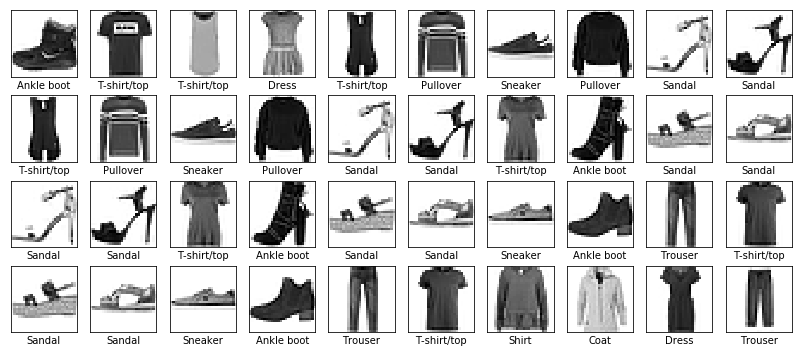

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n_rows = 4
n_cols = 10

fig, ax = plt.subplots(n_rows, n_cols, figsize=(14, 6))
for i in range(n_rows):
    for j in range(n_cols):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].imshow(train_images[i * n_rows + j], cmap=plt.cm.binary)
        ax[i][j].set_xlabel(class_names[train_labels[i * n_rows + j]])

Давайте, наконец, что-нибудь пообучаем. Для начала посмотрим, как себя покажет обычный линейный классификатор. 

Простейшие модели в `keras` реализуются с помощью класса `Sequential`. Класс есть просто обертка над списком слоев, через которые последовательно прокидывается инпут.

Сначала необходимо преобразовать двумерное изображение в одномерный массив с помощью слоя `Flatten`.

Затем добавим линейный слой с функцией активации `Softmax`.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size = 500
model.fit(train_images, train_labels, 
          epochs=epochs, batch_size=batch_size,
          validation_data=(test_images, test_labels))

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/sample - loss: 1.0295 - acc: 0.6693 - val_loss: 0.7285 - val_acc: 0.7587
Epoch 2/20
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6466 - acc: 0.7913 - val_loss: 0.6191 - val_acc: 0.7921
Epoch 3/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5698 - acc: 0.8129 - val_loss: 0.5696 - val_acc: 0.8081
Epoch 4/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5303 - acc: 0.8246 - val_loss: 0.5418 - val_acc: 0.8177
Epoch 5/20
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5054 - acc: 0.8331 - val_loss: 0.5218 - val_acc: 0.8243
Epoch 6/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4876 - acc: 0.8382 - val_loss: 0.5089 - val_acc: 0.8260
Epoch 7/20
60000/60000 [======================

Довольно неплохой результат для классификации на 10 классов (`accuracy` рандомного классификатора была бы всего 10%). Но можно сделать лучше.

![layers](https://pbs.twimg.com/media/CYggEo-VAAACg_n.png:small)

Теперь время применять магию дип лернинга! Напишите модель, в которой будет хотя бы 3 линейных слоя. Во внутренних слоях используйте функцию активацию `ReLU` (`tf.nn.relu`). Будем считать, что модель должна набрать хотя бы 87% на тестовой выборке

In [0]:
model = keras.Sequential([
    <YOUR CODE HERE>
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size = 500
model.fit(train_images, train_labels, 
          epochs=epochs, batch_size=batch_size,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.6251 - acc: 0.7874 - val_loss: 0.4669 - val_acc: 0.8367
Epoch 2/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4130 - acc: 0.8542 - val_loss: 0.4376 - val_acc: 0.8472
Epoch 3/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3702 - acc: 0.8682 - val_loss: 0.3958 - val_acc: 0.8593
Epoch 4/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3390 - acc: 0.8790 - val_loss: 0.3771 - val_acc: 0.8667
Epoch 5/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3254 - acc: 0.8842 - val_loss: 0.3824 - val_acc: 0.8648
Epoch 6/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3027 - acc: 0.8906 - val_loss: 0.3606 - val_acc: 0.8717
Epoch 7/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2856 - acc: 0.8960 - val_loss: 0.

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100 * np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

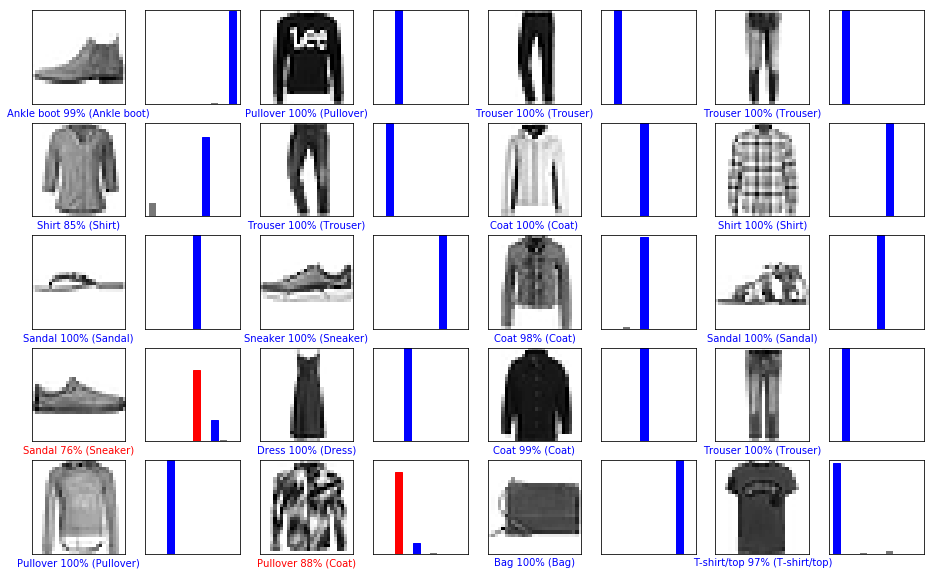

In [0]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Теперь давайте обучим сверточную нейросеть. Для этого нам понадобится 2 новых слоя: `keras.layers.Conv2D` -- сам сверточный слой, и `keras.layers.MaxPool2D` -- слой пулинга. Здесь код уже написан за вас, просто запускайте все клетки последовательно.

In [0]:
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1)),
    
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.3),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.3),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(128, kernel_size=7, padding='same', activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size = 500
model.fit(train_images, train_labels, 
          epochs=epochs, batch_size=batch_size,
          validation_data=(test_images, test_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.6165 - acc: 0.7742 - val_loss: 0.5087 - val_acc: 0.8425
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3699 - acc: 0.8672 - val_loss: 0.4212 - val_acc: 0.8763
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3192 - acc: 0.8849 - val_loss: 0.3782 - val_acc: 0.8725
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2910 - acc: 0.8944 - val_loss: 0.3311 - val_acc: 0.8929
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2684 - acc: 0.9023 - val_loss: 0.3201 - val_acc: 0.9001
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2509 - acc: 0.9090 - val_loss: 0.2957 - val_acc: 0.9042


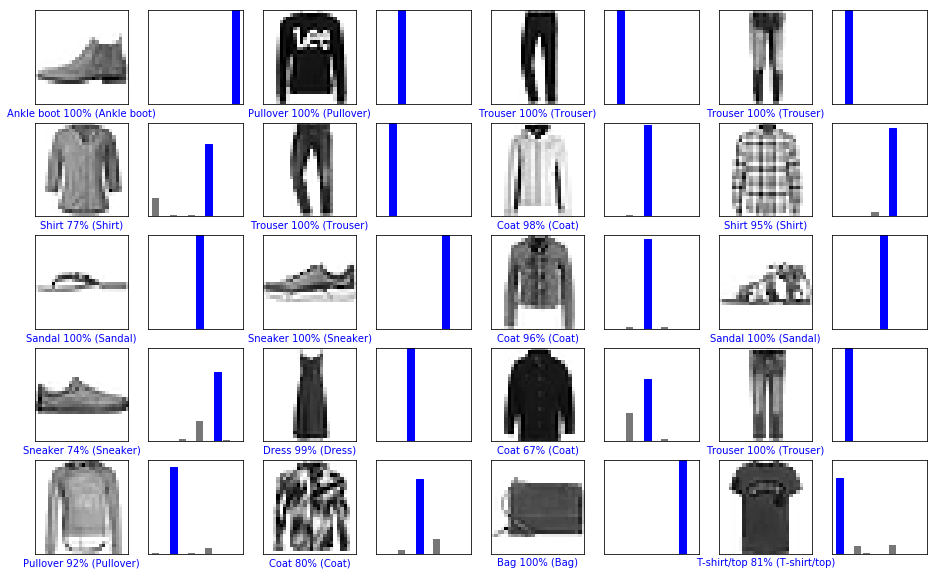

In [0]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()